# 🏙️ California Housing Prices

In [18]:
import pandas as pd
import numpy as np

import os
import requests

import matplotlib.pyplot as plt
%matplotlib inline
import sklearn as sk

## Data Processing

In [19]:
csv_path = os.path.join(os.getcwd(), "dataset", "housing.csv")  # Path to the csv file
df = pd.read_csv(csv_path)
df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [21]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [22]:
df["ocean_proximity"].value_counts()    # Count the number of each category in the column "ocean_proximity".

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [23]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


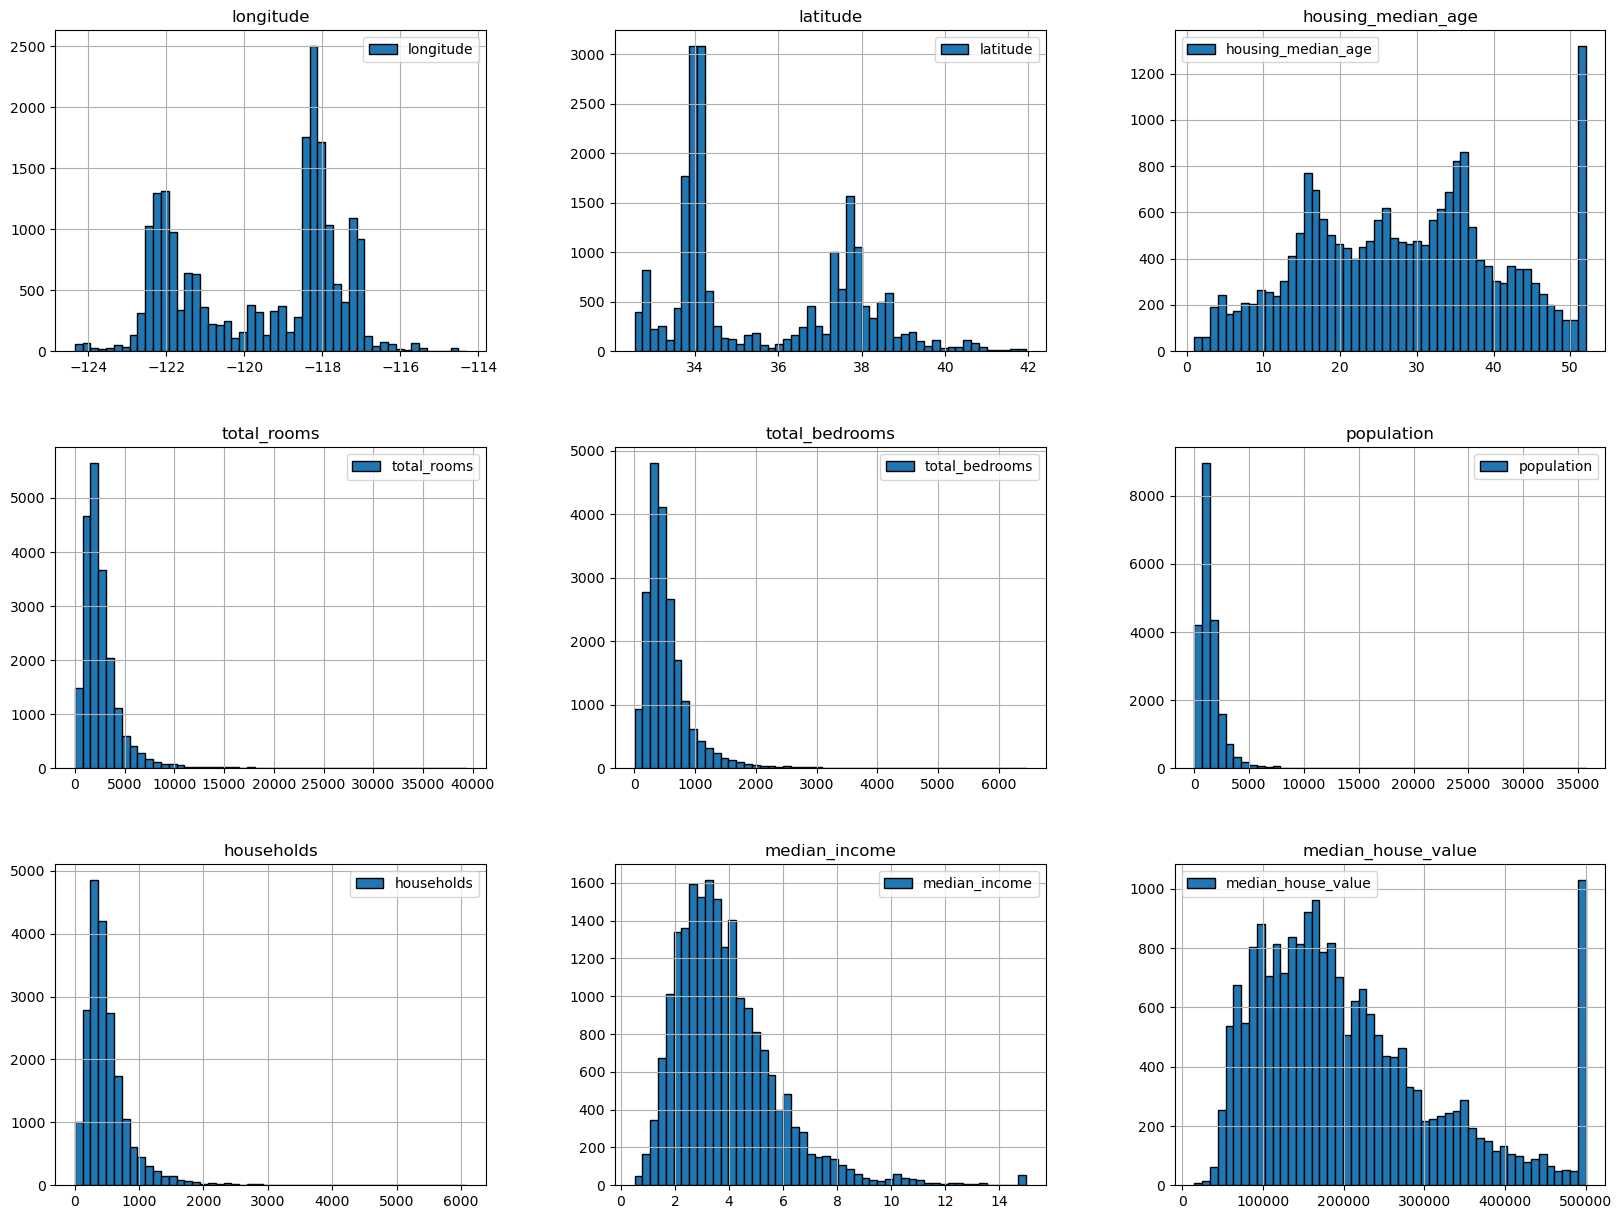

In [24]:
# Histograms

df.hist(
    bins = 50,
    figsize = (20, 15),
    legend = True,
    edgecolor = "black",
    );

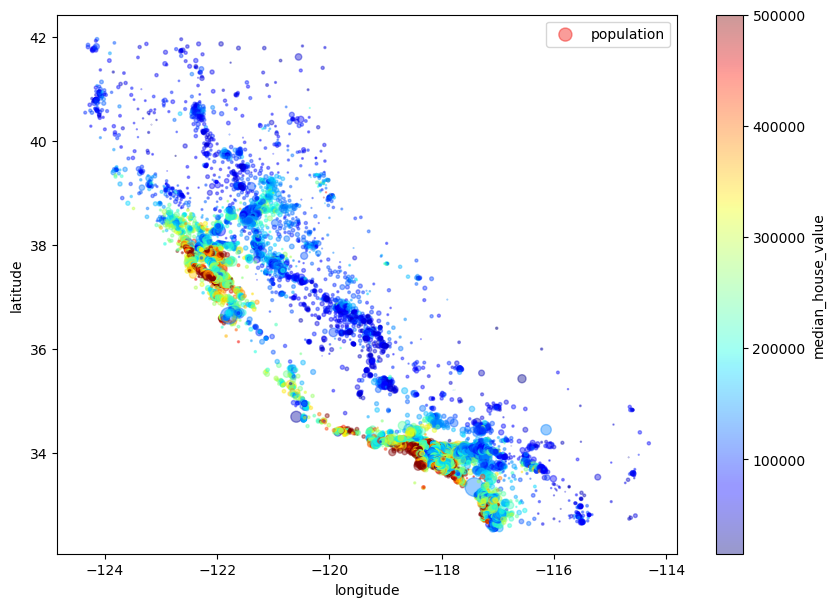

In [37]:
# Plotting the dataset to see the distribution of the data

df.plot(
    kind = 'scatter', 
    x = 'longitude',
    y = 'latitude',
    alpha = 0.4,
    s = df['population']/200,
    label = 'population',
    figsize = (10,7),
    c = 'median_house_value', 
    cmap = plt.get_cmap('jet'),  # type: ignore    
    colorbar = True,
    );

## Creating a Train & Test Set

In [26]:
# Creating a Test Set

def split_train_test(data, test_ratio):
    np.random.seed(42)    # To get the same shuffled indices every time
    shuffled_indices = np.random.permutation(len(data))    # Shuffling the indices
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]     # First 20% of the shuffled indices
    train_indices = shuffled_indices[test_set_size:]        # Last 80% of the shuffled indices
    
    return data.iloc[train_indices], data.iloc[test_indices]

In [27]:
train_set, test_set = split_train_test(df, 0.2) # 20% of the data is the "test" set
percentages = (len(train_set)/len(df), len(test_set)/len(df))

print(f">> Train Set Size: {len(train_set)} ({percentages[0]*100}%)\n>> Test Set Size: {len(test_set)} ({percentages[1]*100}%)")

>> Train Set Size: 16512 (80.0%)
>> Test Set Size: 4128 (20.0%)


### Hashing the unique identifier for every instance to create a test set

In [28]:
from zlib import crc32      # To generate a unique identifier for each row

def test_set_check(identifier, test_ratio): 
    
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32    # type: ignore 
    # Returns "True" if the identifier is in the test set.

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]       # Extracting the unique identifier column
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))        # Applying the "test_set_check()" function to the unique identifier column to get a boolean array.
    
    return data.loc[~in_test_set], data.loc[in_test_set]    
    # The ~ flips 1s to 0s and 0s to 1s.

#### "crc32" is a hash function that generates a unique identifier for each value given.

In [29]:
df_with_id = df.reset_index()      # Adds an "index" column  
train_set, test_set = split_train_test_by_id(df_with_id, 0.2, "index")     # Using the "index" column as the unique identifier column.

In [30]:
# It's better to use sci-kit learn's "train_test_split()" function to split the data into train and test sets.
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size = 0.2, random_state = 42)  # 20% of the data is the "test" set with a random state of 42.

percentages = (len(train_set)/len(df), len(test_set)/len(df))
print(f">> Train Set Size: {len(train_set)} ({percentages[0]*100}%)\n>> Test Set Size: {len(test_set)} ({percentages[1]*100}%)")

>> Train Set Size: 16512 (80.0%)
>> Test Set Size: 4128 (20.0%)


#### To be able to guarantee that the test and train sets are representetive of the dataset "stratified sampling" is used.

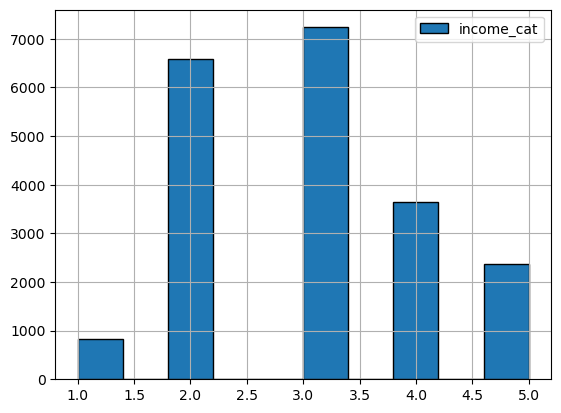

In [31]:
# Creating a new column "income_cat" with 5 categories.
df["income_cat"] = pd.cut(df["median_income"],
                               bins = [0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels = [1, 2, 3, 4, 5])

df["income_cat"].hist(
    edgecolor = "black",
    legend = True
);

In [32]:
# Stratified Sampling based on the "income_cat" column
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)

for train_index, test_index in split.split(df, df["income_cat"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [33]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)
# Percentage of each category in the "income_cat" column of the test set.

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

#### Discarding the changes made in the data

In [34]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis = 1, inplace = True)